In [131]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
raw_data = pd.read_csv("../Raochuan/Kth_09_10.csv")
raw_data.tail()

,index,School Year,Grade Level,Count of Students,total,White,Black/ African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,...,10 & 11 Years,12 & 13 Years,14 Years,15 Years,16 Years,17 Years,18 Years,19 Years,20 Years,21 Years
152,696.02,20092010,K,0.0,1408.0,870.0,274.0,1.0,75.0,0.0,...,162.0,162.0,93.0,87.0,91.0,84.0,73.0,75.0,65.0,87.0
153,726.00,20092010,K,0.0,413.0,0.0,368.0,0.0,0.0,0.0,...,48.0,43.0,29.0,23.0,28.0,25.0,27.0,28.0,30.0,35.0
154,902.00,20092010,K,0.0,1069.0,7.0,745.0,5.0,10.0,1.0,...,112.0,128.0,75.0,72.0,58.0,76.0,73.0,68.0,62.0,76.0
155,906.00,20092010,K,0.0,1596.0,9.0,1057.0,4.0,6.0,0.0,...,188.0,177.0,101.0,98.0,93.0,105.0,94.0,98.0,86.0,102.0
156,1144.00,20092010,K,0.0,777.0,5.0,419.0,1.0,11.0,6.0,...,76.0,108.0,42.0,43.0,36.0,32.0,45.0,38.0,41.0,63.0


In [132]:
data = raw_data[['index','Count of Students']]
data['Wht%'] = raw_data['White'] / raw_data['total']
data['Blc%'] = raw_data.iloc[:,6] / raw_data['total']
data['Ind%'] = raw_data.iloc[:,7] / raw_data['total']
data['Asn%'] = raw_data.iloc[:,8] / raw_data['total']
data['Mix%'] = raw_data.iloc[:,11] / raw_data['total']
data['His%'] = raw_data.iloc[:,12] / raw_data['total']
data['Age3to4'] = raw_data.iloc[:,16] / raw_data.iloc[:,13]
data['Age5'] = raw_data.iloc[:,17] / raw_data.iloc[:,13]
data['Age6'] = raw_data.iloc[:,18] / raw_data.iloc[:,13]
data['Age7to9'] = raw_data.iloc[:,19] / raw_data.iloc[:,13]
data.head()

,index,Count of Students,Wht%,Blc%,Ind%,Asn%,Mix%,His%,Age3to4,Age5,Age6,Age7to9
0,18.0,0.0,0.000000,0.333333,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000
1,20.0,6.0,0.021008,0.012605,0.006303,0.042017,0.006303,0.909664,0.081433,0.043974,0.048860,0.138436
2,22.0,53.0,0.069246,0.029532,0.004073,0.082485,0.020367,0.787169,0.095392,0.050121,0.040420,0.130154
3,30.0,11.0,0.535912,0.024862,0.000000,0.129834,0.082873,0.226519,0.102506,0.045558,0.031891,0.134396
4,34.0,25.0,0.559415,0.000000,0.000000,0.186472,0.047532,0.206581,0.094880,0.052711,0.043675,0.146084


In [133]:
import sklearn.linear_model
msk = np.random.rand(len(data)) < 0.7
X_train = data[msk].drop('Count of Students',1)
y_train = data[msk]['Count of Students']
X_test = data[~msk].drop('Count of Students',1)
y_test = data[~msk]['Count of Students']

In [134]:
def mean_rela_abs_error(ser_true, ser_pred):
    return np.median(np.abs((ser_pred-ser_true)/ser_true))

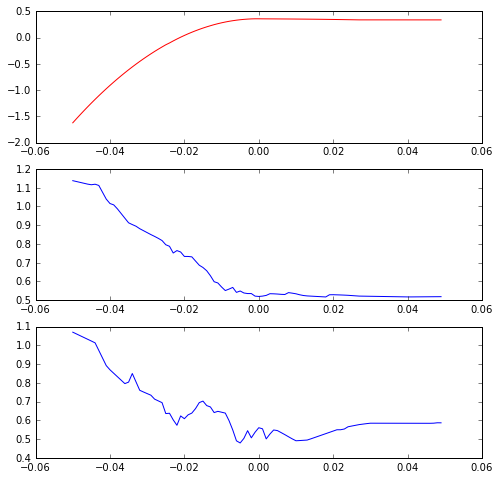

In [135]:
train_MRAE, vali_MRAE, score = [],[],[]
alphas = [i * 0.001 for i in range(-50,50)] 
for i in alphas:
    lModel = sklearn.linear_model.Lasso(alpha = i)
    lModel.fit(X_train, y_train)
    train_pred = lModel.predict(X_train)
    vali_pred = lModel.predict(X_test)
    train_MRAE.append(mean_rela_abs_error(y_train, train_pred))
    vali_MRAE.append(mean_rela_abs_error(y_test, vali_pred))
    score.append(lModel.score(X_train, y_train))
plt.figure(figsize = (8, 8))
plt.title('Different R-square values with different alphas in lasso regression')
ax1 = plt.subplot(311)
ax1.plot(alphas, score, 'r-')
ax2 = plt.subplot(312)
ax2.plot(alphas, train_MRAE, 'b-')
ax3 = plt.subplot(313)
ax3.plot(alphas, vali_MRAE, 'b-')
plt.show()

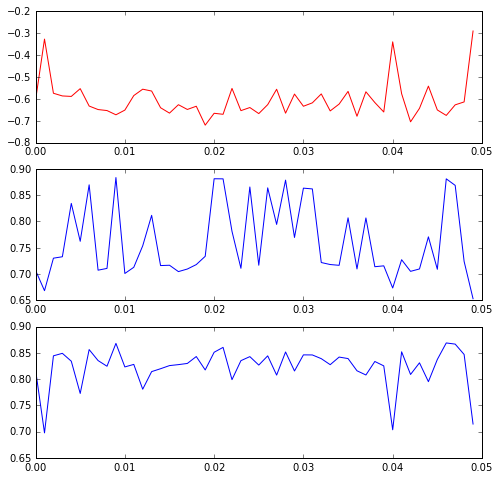

In [136]:
import sklearn.neural_network
train_MRAE, vali_MRAE, score = [],[],[]
alphas = [i * 0.001 for i in range(0,50)] 
for i in alphas:
    nnModel = sklearn.neural_network.MLPRegressor(alpha = i)
    nnModel.fit(X_train, y_train)
    train_pred = nnModel.predict(X_train)
    vali_pred = nnModel.predict(X_test)
    train_MRAE.append(mean_rela_abs_error(y_train, train_pred))
    vali_MRAE.append(mean_rela_abs_error(y_test, vali_pred))
    score.append(nnModel.score(X_train, y_train))
plt.figure(figsize = (8, 8))
plt.title('Different values with different alphas in neural network')
ax1 = plt.subplot(311)
ax1.plot(alphas, score, 'r-')
ax2 = plt.subplot(312)
ax2.plot(alphas, train_MRAE, 'b-')
ax3 = plt.subplot(313)
ax3.plot(alphas, vali_MRAE, 'b-')
plt.show()

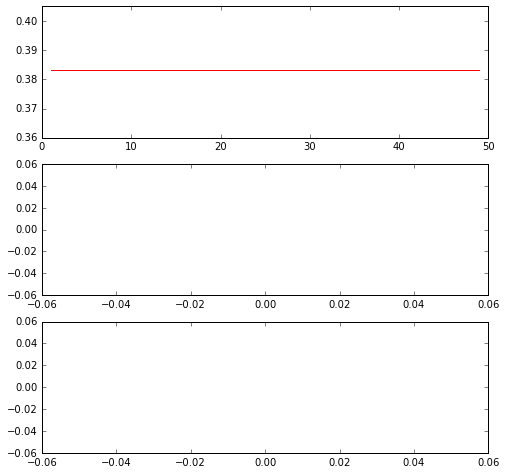

In [137]:
import sklearn.neighbors
kModel = sklearn.neighbors.KNeighborsRegressor()

train_MRAE, vali_MRAE, score = [],[],[]
alphas = [i for i in range(1,50)] 
for i in alphas:
    kModel = sklearn.neighbors.KNeighborsRegressor(leaf_size = i)
    kModel.fit(X_train, y_train)
    train_pred = kModel.predict(X_train)
    vali_pred = kModel.predict(X_test)
    train_MRAE.append(mean_rela_abs_error(y_train, train_pred))
    vali_MRAE.append(mean_rela_abs_error(y_test, vali_pred))
    score.append(kModel.score(X_train, y_train))
plt.figure(figsize = (8, 8))
plt.title('Different values with different alphas in neural network')
ax1 = plt.subplot(311)
ax1.plot(alphas, score, 'r-')
ax2 = plt.subplot(312)
ax2.plot(alphas, train_MRAE, 'b-')
ax3 = plt.subplot(313)
ax3.plot(alphas, vali_MRAE, 'b-')
plt.show()

In [138]:
data_2010 = pd.read_csv("nyc_tract_2010.csv")
data_2010_predict = pd.read_csv("2010_predict.csv")
data_2009_predict = pd.read_csv("2009_predict.csv", header = None)
data_2009_predict.columns = data_2010_predict.columns[2:]
data_2009_predict.insert(0, "Census Tract", data_2010_predict["Census Tract"])
index_brkn = data_2010_predict.ix[data_2010_predict['Borough'] == 'Brooklyn'].index.values
data_2009_brkn = data_2009_predict.ix[index_brkn,]
ct_index = raw_data['index']
for i in range(len(ct_index)):
    if (ct_index[i] % 1 != 0):
        ct_index[i] = ct_index[i] * 100
data_2009_filter = data_2009_brkn.ix[data_2009_brkn['Census Tract'].isin(ct_index)]
data_2009_filter.reset_index()
data_2010_brkn = data_2010.ix[data_2010['Borough'] == 'Brooklyn']
data_2010_brkn.drop("Borough",1,inplace = True)
data_2010_brkn.drop("Total Population",1,inplace = True)
data_2010_brkn.drop("Median Age",1,inplace = True)
data_2010_brkn.columns.values[0] = 'Census Tract'
data_2010_brkn.head()

,Census Tract,Under 5 Years,5-9 Years,10-14 Years,15-19 Years,20-24 Years,25-29 Years,30-34 Years,35-39 Years,40-44 Years,45-49 Years,50-54 Years,55-59 Years,60-64 Years,65 Years and Over
339,100,211,146,100,95,163,374,407,388,373,348,266,317,307,843
340,200,149,125,99,139,195,145,94,102,110,91,52,50,49,70
341,301,296,164,96,91,155,355,445,454,381,311,273,282,268,688
342,501,182,109,66,518,642,356,376,312,285,217,188,231,212,553
343,502,110,64,49,49,100,338,352,257,213,161,144,155,163,357


In [139]:
data_2010_brkn['Census Tract'] = data_2010_brkn['Census Tract'] / 100
data_2010_brkn.reset_index()

for i in range(len(data_2010_brkn['Census Tract'])):
    if (data_2010_brkn.iloc[i]['Census Tract'] % 1 != 0):
        data_2010_brkn.set_value(data_2010_brkn.index.values[i],'Census Tract', data_2010_brkn.iloc[i]['Census Tract']*100)
data_2010_filter = data_2010_brkn.ix[data_2010_brkn['Census Tract'].isin(ct_index)]
data_2010_filter.head()

,Census Tract,Under 5 Years,5-9 Years,10-14 Years,15-19 Years,20-24 Years,25-29 Years,30-34 Years,35-39 Years,40-44 Years,45-49 Years,50-54 Years,55-59 Years,60-64 Years,65 Years and Over
349,18.0,1,0,1,18,202,330,410,388,319,196,132,55,29,24
350,20.0,139,142,120,151,140,162,160,141,110,101,97,71,46,92
352,22.0,311,273,216,306,362,472,400,292,270,272,265,252,239,683
355,30.0,108,93,98,97,95,137,151,147,110,141,128,107,89,229
358,34.0,178,161,132,130,157,215,265,244,269,237,225,197,190,447


In [140]:
ct_09 = data_2009_filter['Census Tract']
ct_10 = data_2010_filter['Census Tract']
ct_overlap = ct_10[ct_10.isin(ct_09)]
data_09 = data_2009_filter.ix[data_2009_filter['Census Tract'].isin(ct_overlap)]
data_10 = data_2010_filter.ix[data_2010_filter['Census Tract'].isin(ct_overlap)]
data_09.reset_index()
data_10.reset_index()
df = pd.DataFrame(index=ct_overlap.values, columns=["Under 5 Years","5-9 Years"])
df["Under 5 Years"] = [a - b for a, b in zip(data_10["Under 5 Years"], data_09["Under 5 Years"])]
df["5-9 Years"] = [a - b for a, b in zip(data_10["5-9      Years"], data_09["5-9      Years"])]
df["index"] = df.index.values
for i in range(len(df['index'])):
    if (df.iloc[i]['index'] > 906):
        df.set_value(df.index.values[i],'index', df.iloc[i]['index']*0.01)
df = pd.merge(df, data, how='left',on='index')

In [141]:
dfrace = pd.read_csv("../Raochuan/race2010_labeled.csv")
dfrace['race0'] = np.where(dfrace['race']==0,1,0)
dfrace['race1'] = np.where(dfrace['race']==1,1,0)
dfrace['race2'] = np.where(dfrace['race']==2,1,0)
dfrace['race3'] = np.where(dfrace['race']==3,1,0)
dfrace.drop('race',1,inplace=True)
dfrace.head()

,index,total,White,Black/ African American,Asian,Two or More Races,Hispanic Origin,race0,race1,race2,race3
0,18.0,3.0,0.000000,0.333333,0.000000,0.000000,0.666667,0,0,1,0
1,20.0,476.0,0.021008,0.012605,0.042017,0.006303,0.909664,0,0,1,0
2,22.0,982.0,0.069246,0.029532,0.082485,0.020367,0.787169,0,0,1,0
3,30.0,362.0,0.535912,0.024862,0.129834,0.082873,0.226519,0,1,0,0
4,34.0,547.0,0.559415,0.000000,0.186472,0.047532,0.206581,0,1,0,0


In [142]:
df = pd.merge(df, dfrace, how='left',on='index')
df.drop(df.columns[[4,5,6,7,8,9,14,15,16,17,18,19]], axis=1, inplace=True)

In [143]:
import sklearn.linear_model
msk = np.random.rand(len(df)) < 0.7
X_train = df[msk].drop('Count of Students',1)
y_train = df[msk]['Count of Students']
X_test = df[~msk].drop('Count of Students',1)
y_test = df[~msk]['Count of Students']

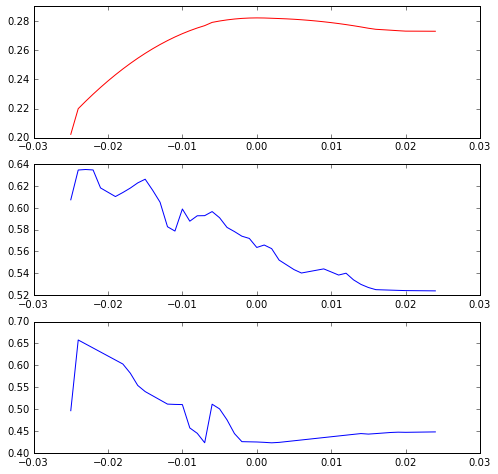

In [144]:
train_MRAE, vali_MRAE, score = [],[],[]
alphas = [i * 0.001 for i in range(-25,25)] 
for i in alphas:
    lModel = sklearn.linear_model.Lasso(alpha = i)
    lModel.fit(X_train, y_train)
    train_pred = lModel.predict(X_train)
    vali_pred = lModel.predict(X_test)
    train_MRAE.append(mean_rela_abs_error(y_train, train_pred))
    vali_MRAE.append(mean_rela_abs_error(y_test, vali_pred))
    score.append(lModel.score(X_train, y_train))
plt.figure(figsize = (8, 8))
plt.title('Different R-square values with different alphas in lasso regression')
ax1 = plt.subplot(311)
ax1.plot(alphas, score, 'r-')
ax2 = plt.subplot(312)
ax2.plot(alphas, train_MRAE, 'b-')
ax3 = plt.subplot(313)
ax3.plot(alphas, vali_MRAE, 'b-')
plt.show()

In [145]:
print(df["Under 5 Years"].mean())
print(df["Under 5 Years"].median())
print(df["5-9 Years"].mean())
print(df["5-9 Years"].median())

5.76510067114094
-3.0
18.483221476510067
12.0


We add a varibale counting the Students at kindergarten level in school year of 20082009

In [146]:
raw_data = pd.read_csv("../targets.csv")
Kth_data = raw_data.ix[raw_data['Grade Level'] == 'K']
Kth_08_09 = Kth_data.ix[Kth_data['School Year'] == 20082009]
Kth_08_09.drop("Grade Level",1,inplace = True)
Kth_08_09.drop("School Year",1,inplace = True)

In [147]:
Kth_08_09.columns.values[0] = "index"
Kth_08_09.columns.values[1] = "Count of Students 09"

In [148]:
df = pd.merge(df, Kth_08_09, how='left',on='index')
df = df.fillna(0)
df.head()

,Under 5 Years,5-9 Years,index,Count of Students,Age3to4,Age5,Age6,Age7to9,race0,race1,race2,race3,Count of Students 09
0,-4.0,-1.0,18.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0.0
1,-13.0,12.0,20.0,6.0,0.081433,0.043974,0.048860,0.138436,0,0,1,0,6.0
2,-18.0,-5.0,22.0,53.0,0.095392,0.050121,0.040420,0.130154,0,0,1,0,38.0
3,-31.0,-14.0,30.0,11.0,0.102506,0.045558,0.031891,0.134396,0,1,0,0,10.0
4,-1.0,36.0,34.0,25.0,0.094880,0.052711,0.043675,0.146084,0,1,0,0,16.0


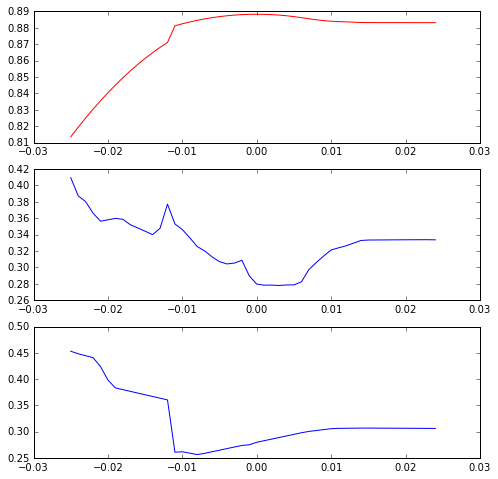

0.888274237724
0.277970362153
0.256190267704


In [161]:
msk = np.random.rand(len(df)) < 0.7
X_train = df[msk].drop('Count of Students',1)
y_train = df[msk]['Count of Students']
X_test = df[~msk].drop('Count of Students',1)
y_test = df[~msk]['Count of Students']
train_MRAE, vali_MRAE, score = [],[],[]
alphas = [i * 0.001 for i in range(-25,25)] 
for i in alphas:
    lModel = sklearn.linear_model.Lasso(alpha = i)
    lModel.fit(X_train, y_train)
    train_pred = lModel.predict(X_train)
    vali_pred = lModel.predict(X_test)
    train_MRAE.append(mean_rela_abs_error(y_train, train_pred))
    vali_MRAE.append(mean_rela_abs_error(y_test, vali_pred))
    score.append(lModel.score(X_train, y_train))
plt.figure(figsize = (8, 8))
plt.title('Different R-square values with different alphas in lasso regression')
ax1 = plt.subplot(311)
ax1.plot(alphas, score, 'r-')
ax2 = plt.subplot(312)
ax2.plot(alphas, train_MRAE, 'b-')
ax3 = plt.subplot(313)
ax3.plot(alphas, vali_MRAE, 'b-')
plt.show()
print(max(score))
print(min(train_MRAE))
print(min(vali_MRAE))

In [162]:
from pandas.stats.api import ols
res = ols(y=y_train, x=X_train)
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Under 5 Years> + <5-9 Years> + <index> + <Age3to4> + <Age5>
             + <Age6> + <Age7to9> + <race0> + <race1> + <race2> + <race3>
             + <Count of Students 09> + <intercept>

Number of Observations:         112
Number of Degrees of Freedom:   13

R-squared:         0.8883
Adj R-squared:     0.8747

Rmse:              7.5696

F-stat (12, 99):    65.5915, p-value:     0.0000

Degrees of Freedom: model 12, resid 99

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
 Under 5 Years     0.0529     0.0225       2.36     0.0205     0.0089     0.0970
     5-9 Years    -0.0355     0.0267      -1.33     0.1863    -0.0878     0.0168
         index    -0.0022     0.0059      -0.38     0.7057    -0.0137

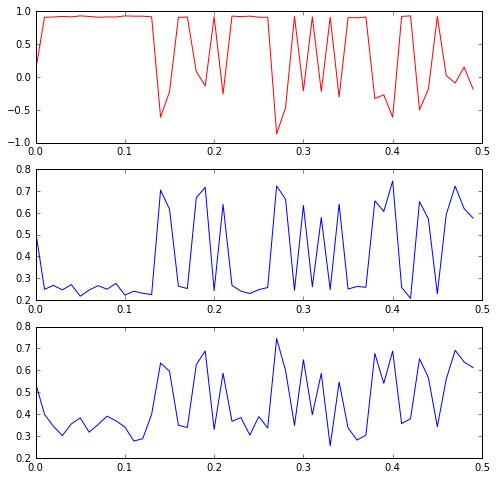

0.931688460472
0.20847135688
0.254493765238


In [150]:
import sklearn.neural_network
train_MRAE, vali_MRAE, score = [],[],[]
alphas = [i * 0.01 for i in range(0,50)] 
for i in alphas:
    nnModel = sklearn.neural_network.MLPRegressor(alpha = i)
    nnModel.fit(X_train, y_train)
    train_pred = nnModel.predict(X_train)
    vali_pred = nnModel.predict(X_test)
    train_MRAE.append(mean_rela_abs_error(y_train, train_pred))
    vali_MRAE.append(mean_rela_abs_error(y_test, vali_pred))
    score.append(nnModel.score(X_train, y_train))
plt.figure(figsize = (8, 8))
plt.title('Different values with different alphas in neural network')
ax1 = plt.subplot(311)
ax1.plot(alphas, score, 'r-')
ax2 = plt.subplot(312)
ax2.plot(alphas, train_MRAE, 'b-')
ax3 = plt.subplot(313)
ax3.plot(alphas, vali_MRAE, 'b-')
plt.show()
print(max(score))
print(min(train_MRAE))
print(min(vali_MRAE))

The performance of neural network seems to be unstable. The likelihood of overfitting is very high

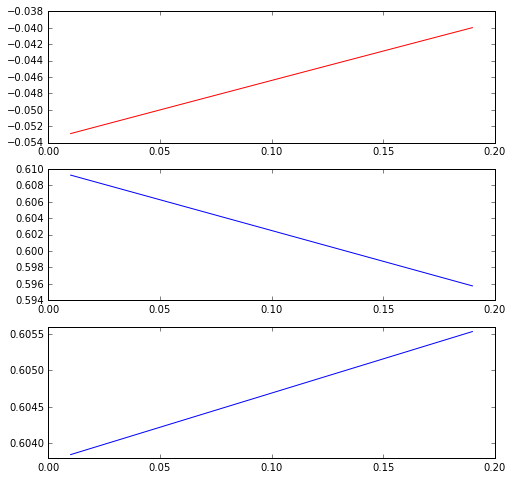

-0.0399795208724
0.595748536843
0.603843721068


In [151]:
import sklearn.svm
train_MRAE, vali_MRAE, score = [],[],[]
alphas = [i * 0.01 for i in range(1,20)] 

for i in alphas:
    sModel = sklearn.svm.SVR(C = i, kernel = "rbf")
    sModel.fit(X_train, y_train)
    train_pred = sModel.predict(X_train)
    vali_pred = sModel.predict(X_test)
    train_MRAE.append(mean_rela_abs_error(y_train, train_pred))
    vali_MRAE.append(mean_rela_abs_error(y_test, vali_pred))
    score.append(sModel.score(X_train, y_train))
plt.figure(figsize = (8, 8))
plt.title('Different values with different alphas in Support Vector Regression')
ax1 = plt.subplot(311)
ax1.plot(alphas, score, 'r-')
ax2 = plt.subplot(312)
ax2.plot(alphas, train_MRAE, 'b-')
ax3 = plt.subplot(313)
ax3.plot(alphas, vali_MRAE, 'b-')
plt.show()
print(max(score))
print(min(train_MRAE))
print(min(vali_MRAE))

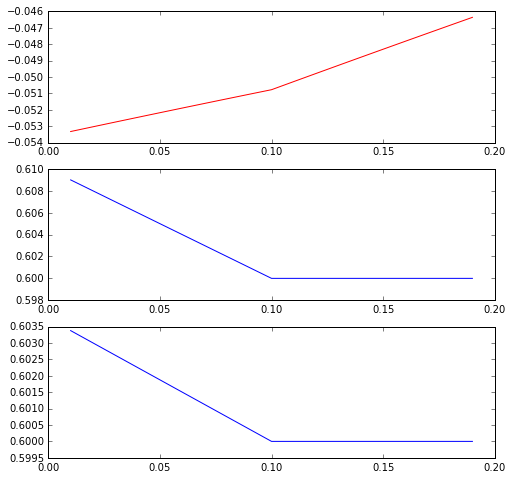

-0.046362361449
0.6
0.6


In [152]:
import sklearn.svm
train_MRAE, vali_MRAE, score = [],[],[]
alphas = [i * 0.01 for i in range(1,20)] 

for i in alphas:
    sModel = sklearn.svm.SVR(C = i, kernel = "sigmoid")
    sModel.fit(X_train, y_train)
    train_pred = sModel.predict(X_train)
    vali_pred = sModel.predict(X_test)
    train_MRAE.append(mean_rela_abs_error(y_train, train_pred))
    vali_MRAE.append(mean_rela_abs_error(y_test, vali_pred))
    score.append(sModel.score(X_train, y_train))
plt.figure(figsize = (8, 8))
plt.title('Different values with different alphas in Support Vector Regression')
ax1 = plt.subplot(311)
ax1.plot(alphas, score, 'r-')
ax2 = plt.subplot(312)
ax2.plot(alphas, train_MRAE, 'b-')
ax3 = plt.subplot(313)
ax3.plot(alphas, vali_MRAE, 'b-')
plt.show()
print(max(score))
print(min(train_MRAE))
print(min(vali_MRAE))

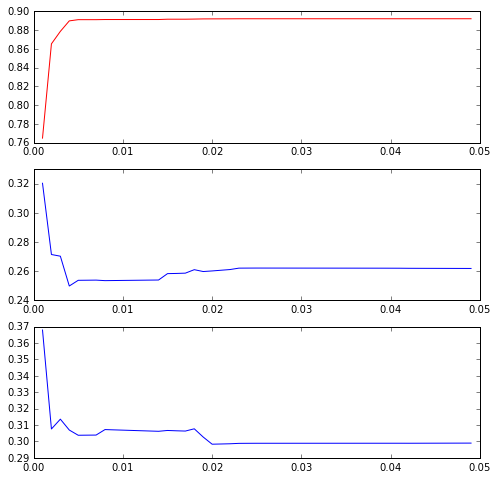

0.892178642927
0.249765654996
0.298284778955


In [153]:
train_MRAE, vali_MRAE, score = [],[],[]
alphas = [i * 0.001 for i in range(1,50)] 

for i in alphas:
    sModel = sklearn.svm.SVR(C = i, kernel = "linear")
    sModel.fit(X_train, y_train)
    train_pred = sModel.predict(X_train)
    vali_pred = sModel.predict(X_test)
    train_MRAE.append(mean_rela_abs_error(y_train, train_pred))
    vali_MRAE.append(mean_rela_abs_error(y_test, vali_pred))
    score.append(sModel.score(X_train, y_train))
plt.figure(figsize = (8, 8))
plt.title('Different values with different alphas in Support Vector Regression')
ax1 = plt.subplot(311)
ax1.plot(alphas, score, 'r-')
ax2 = plt.subplot(312)
ax2.plot(alphas, train_MRAE, 'b-')
ax3 = plt.subplot(313)
ax3.plot(alphas, vali_MRAE, 'b-')
plt.show()
print(max(score))
print(min(train_MRAE))
print(min(vali_MRAE))

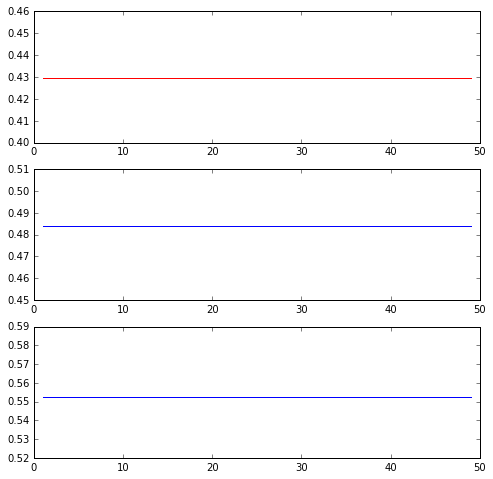

0.429346910972
0.484
0.552584670232


In [154]:
train_MRAE, vali_MRAE, score = [],[],[]
alphas = [i for i in range(1,50)] 
for i in alphas:
    kModel = sklearn.neighbors.KNeighborsRegressor(leaf_size = i)
    kModel.fit(X_train, y_train)
    train_pred = kModel.predict(X_train)
    vali_pred = kModel.predict(X_test)
    train_MRAE.append(mean_rela_abs_error(y_train, train_pred))
    vali_MRAE.append(mean_rela_abs_error(y_test, vali_pred))
    score.append(kModel.score(X_train, y_train))
plt.figure(figsize = (8, 8))
plt.title('Different values with different alphas in knn')
ax1 = plt.subplot(311)
ax1.plot(alphas, score, 'r-')
ax2 = plt.subplot(312)
ax2.plot(alphas, train_MRAE, 'b-')
ax3 = plt.subplot(313)
ax3.plot(alphas, vali_MRAE, 'b-')
plt.show()
print(max(score))
print(min(train_MRAE))
print(min(vali_MRAE))

In [155]:
X_train = pd.DataFrame(df[msk]['Count of Students 09'])
y_train = df[msk]['Count of Students']
X_test = pd.DataFrame(df[~msk]['Count of Students 09'])
y_test = df[~msk]['Count of Students']

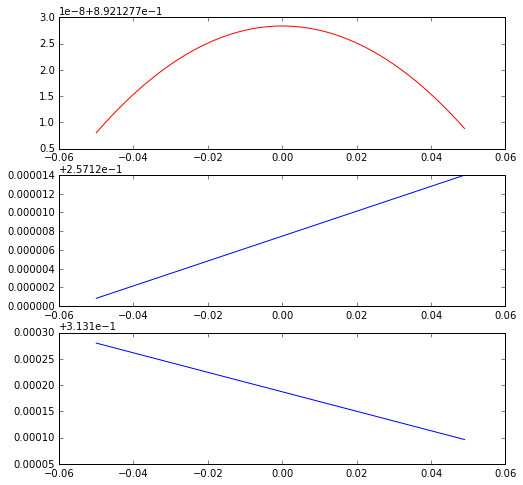

0.892127728363
0.257120846516
0.313196194152


In [156]:
train_MRAE, vali_MRAE, score = [],[],[]
alphas = [i * 0.001 for i in range(-50,50)] 
for i in alphas:
    lModel = sklearn.linear_model.Lasso(alpha = i)
    lModel.fit(X_train, y_train)
    train_pred = lModel.predict(X_train)
    vali_pred = lModel.predict(X_test)
    train_MRAE.append(mean_rela_abs_error(y_train, train_pred))
    vali_MRAE.append(mean_rela_abs_error(y_test, vali_pred))
    score.append(lModel.score(X_train, y_train))
plt.figure(figsize = (8, 8))
plt.title('Different R-square values with different alphas in lasso regression')
ax1 = plt.subplot(311)
ax1.plot(alphas, score, 'r-')
ax2 = plt.subplot(312)
ax2.plot(alphas, train_MRAE, 'b-')
ax3 = plt.subplot(313)
ax3.plot(alphas, vali_MRAE, 'b-')
plt.show()
print(max(score))
print(min(train_MRAE))
print(min(vali_MRAE))

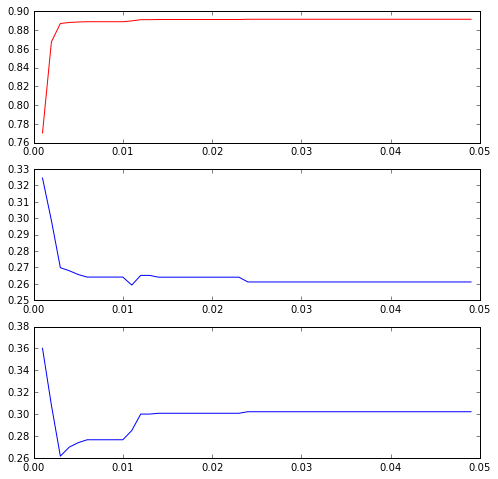

0.89161235462
0.259244264507
0.261519607843


In [157]:
train_MRAE, vali_MRAE, score = [],[],[]
alphas = [i * 0.001 for i in range(1,50)] 

for i in alphas:
    sModel = sklearn.svm.SVR(C = i, kernel = "linear")
    sModel.fit(X_train, y_train)
    train_pred = sModel.predict(X_train)
    vali_pred = sModel.predict(X_test)
    train_MRAE.append(mean_rela_abs_error(y_train, train_pred))
    vali_MRAE.append(mean_rela_abs_error(y_test, vali_pred))
    score.append(sModel.score(X_train, y_train))
plt.figure(figsize = (8, 8))
plt.title('Different values with different alphas in Support Vector Regression')
ax1 = plt.subplot(311)
ax1.plot(alphas, score, 'r-')
ax2 = plt.subplot(312)
ax2.plot(alphas, train_MRAE, 'b-')
ax3 = plt.subplot(313)
ax3.plot(alphas, vali_MRAE, 'b-')
plt.show()
print(max(score))
print(min(train_MRAE))
print(min(vali_MRAE))